# Image prepararation
The idea was to improve the data quality by manipulating the images with approaches from the lecture. Histogram equalization, desnoising and brightness adjustment were used for this purpose. <br>
These image manipulations did not lead to better results.

In [1]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img(path):
    return cv2.imread(path)

In [3]:
def convert_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
def equalize_histogram(img):
    img_y_cr_cb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_y_cr_cb)

    # Applying equalize Hist operation on Y channel.
    y_eq = cv2.equalizeHist(y)
    
    img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))
    return cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCR_CB2BGR)

In [5]:
def denoise_image(img):
    b,g,r = cv2.split(img)           # get b,g,r
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # rgb_img = cv2.merge([r,g,b])     # switch it to rgb

    # Denoising
    dst = cv2.fastNlMeansDenoisingColored(img,None,3,3,7,10)

    b,g,r = cv2.split(dst)           # get b,g,r
    return cv2.merge([r,g,b])     # switch it to rgb

In [6]:
# todo:im histogram checken, ob zu hell oder dunkel -> dann gamma anpassen
def adjust_gamma(image, gamma=1.3):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

# test

In [7]:
# test = load_img('done/apple_rust_leaf_done/Image_104.jpg')
test = load_img('done/apple_rust_leaf_done/Image_111.jpg')
test1 = convert_to_rgb(test)

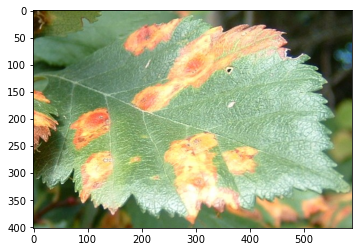

In [8]:
plt.imshow(test1)

In [9]:
test_2 = equalize_histogram(test1)

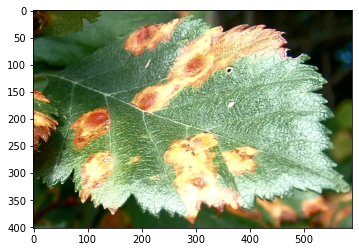

In [10]:
plt.imshow(test_2)

In [11]:
test3 = adjust_gamma(test1)

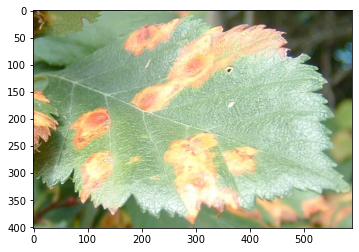

In [12]:
plt.imshow(test3)

In [13]:
test4 = denoise_image(test1)

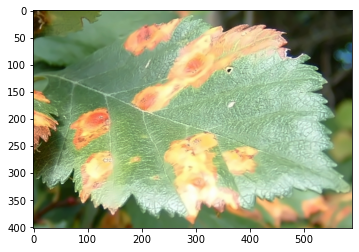

In [14]:
plt.imshow(test4)